<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.425660,78.710529,0.311816,128.448005,128.125563,0.322442
1,0.0,1.0,64.916780,58.114124,0.035933,133.066838,133.029405,0.037434
2,0.0,2.0,52.004747,91.363001,-0.059087,153.308662,153.368088,-0.059427
3,0.0,3.0,68.043000,35.408366,-0.253246,113.198120,113.445270,-0.247150
4,0.0,4.0,30.692258,30.082739,-0.307713,70.467284,70.745473,-0.278189
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.119781,73.174639,-0.285099,118.009321,118.318915,-0.309594
249996,999.0,246.0,47.746434,54.220218,0.263233,112.229885,111.951070,0.278815
249997,999.0,247.0,62.500163,47.949371,0.141265,120.590800,120.410917,0.179882
249998,999.0,248.0,81.006086,25.497635,-0.474583,116.029138,116.414351,-0.385213


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.425660,78.710529,0.311816,128.448005,128.125563,0.322442
1,0.0,1.0,64.916780,58.114124,0.035933,133.066838,133.029405,0.037434
2,0.0,2.0,52.004747,91.363001,-0.059087,153.308662,153.368088,-0.059427
3,0.0,3.0,68.043000,35.408366,-0.253246,113.198120,113.445270,-0.247150
4,0.0,4.0,30.692258,30.082739,-0.307713,70.467284,70.745473,-0.278189
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.119781,73.174639,-0.285099,118.009321,118.318915,-0.309594
249996,999.0,246.0,47.746434,54.220218,0.263233,112.229885,111.951070,0.278815
249997,999.0,247.0,62.500163,47.949371,0.141265,120.590800,120.410917,0.179882
249998,999.0,248.0,81.006086,25.497635,-0.474583,116.029138,116.414351,-0.385213


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.425660  78.710529  0.311816  128.448005  128.125563  0.322442
      1.0    64.916780  58.114124  0.035933  133.066838  133.029405  0.037434
      2.0    52.004747  91.363001 -0.059087  153.308662  153.368088 -0.059427
      3.0    68.043000  35.408366 -0.253246  113.198120  113.445270 -0.247150
      4.0    30.692258  30.082739 -0.307713   70.467284   70.745473 -0.278189
...                ...        ...       ...         ...         ...       ...
999.0 245.0  35.119781  73.174639 -0.285099  118.009321  118.318915 -0.309594
      246.0  47.746434  54.220218  0.263233  112.229885  111.951070  0.278815
      247.0  62.500163  47.949371  0.141265  120.590800  120.410917  0.179882
      248.0  81.006086  25.497635 -0.474583  116.029138  116.414351 -0.385213
      249.0  33.125100  36.473889 -0.103621   79.495369   79.570325 -0.074956

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.425660  78.710529  0.311816  128.448005  128.125563  0.322442
      1.0    64.916780  58.114124  0.035933  133.066838  133.029405  0.037434
      2.0    52.004747  91.363001 -0.059087  153.308662  153.368088 -0.059427
      3.0    68.043000  35.408366 -0.253246  113.198120  113.445270 -0.247150
      4.0    30.692258  30.082739 -0.307713   70.467284   70.745473 -0.278189
...                ...        ...       ...         ...         ...       ...
999.0 245.0  35.119781  73.174639 -0.285099  118.009321  118.318915 -0.309594
      246.0  47.746434  54.220218  0.263233  112.229885  111.951070  0.278815
      247.0  62.500163  47.949371  0.141265  120.590800  120.410917  0.179882
      248.0  81.006086  25.497635 -0.474583  116.029138  116.414351 -0.385213
      249.0  33.125100  36.473889 -0.103621   79.495369   79.570325 -0.074956

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.425660,78.710529,0.311816,128.448005,128.125563,0.322442
1,0.0,1.0,64.916780,58.114124,0.035933,133.066838,133.029405,0.037434
2,0.0,2.0,52.004747,91.363001,-0.059087,153.308662,153.368088,-0.059427
3,0.0,3.0,68.043000,35.408366,-0.253246,113.198120,113.445270,-0.247150
4,0.0,4.0,30.692258,30.082739,-0.307713,70.467284,70.745473,-0.278189
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.119781,73.174639,-0.285099,118.009321,118.318915,-0.309594
249996,999.0,246.0,47.746434,54.220218,0.263233,112.229885,111.951070,0.278815
249997,999.0,247.0,62.500163,47.949371,0.141265,120.590800,120.410917,0.179882
249998,999.0,248.0,81.006086,25.497635,-0.474583,116.029138,116.414351,-0.385213


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.425660  78.710529  0.311816  128.448005  128.125563  0.322442
      1.0    64.916780  58.114124  0.035933  133.066838  133.029405  0.037434
      2.0    52.004747  91.363001 -0.059087  153.308662  153.368088 -0.059427
      3.0    68.043000  35.408366 -0.253246  113.198120  113.445270 -0.247150
      4.0    30.692258  30.082739 -0.307713   70.467284   70.745473 -0.278189
...                ...        ...       ...         ...         ...       ...
999.0 245.0  35.119781  73.174639 -0.285099  118.009321  118.318915 -0.309594
      246.0  47.746434  54.220218  0.263233  112.229885  111.951070  0.278815
      247.0  62.500163  47.949371  0.141265  120.590800  120.410917  0.179882
      248.0  81.006086  25.497635 -0.474583  116.029138  116.414351 -0.385213
      249.0  33.125100  36.473889 -0.103621   79.495369   79.570325 -0.074956

[250000 rows x 6 columns]

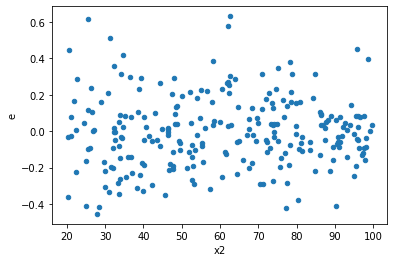

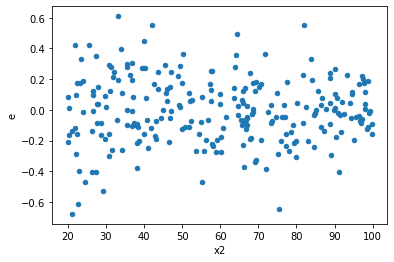

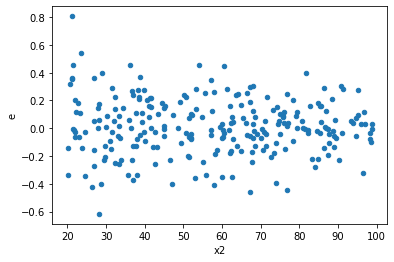

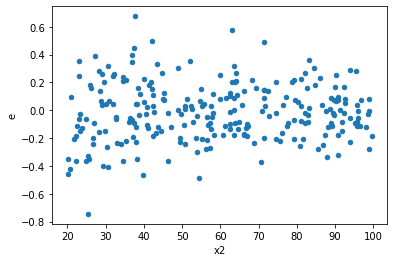

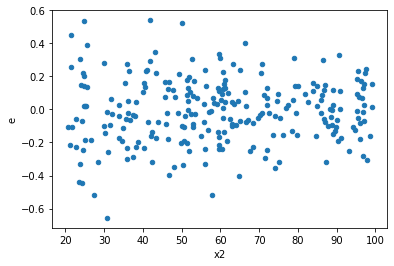

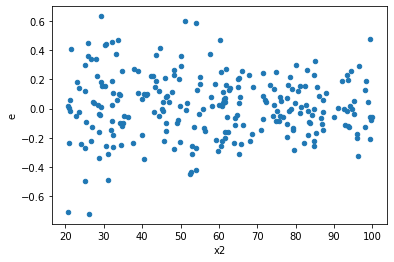

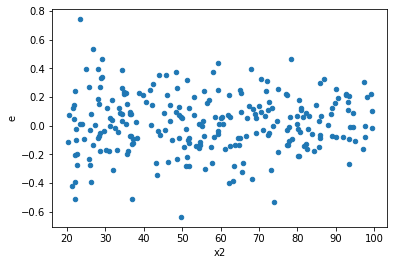

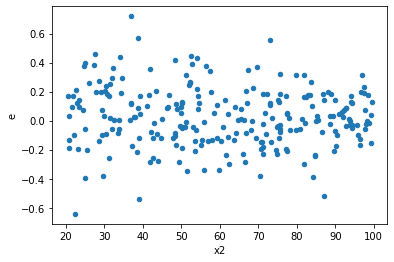

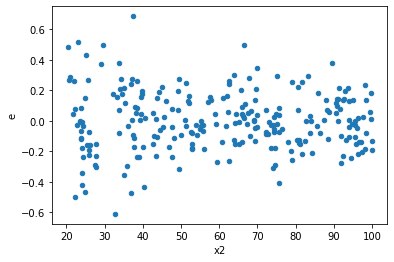

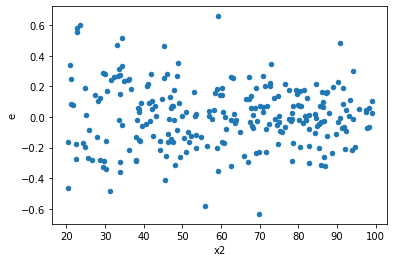

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
21.0,98.0,98.0,3.5390555275057336,3.756707562645925,0.03611281150516055,0.03833375063924413,1.061500033963465,0.7682677546798828,0.6158661226600586,0.3841338773399414,Reject001=1 : Homoscedasticity
38.0,98.0,98.0,3.6894543883057733,3.745427646347976,0.03764749375822218,0.03821864945253037,1.0151711478585066,0.9407404939188571,0.5296297530405715,0.47037024695942853,Reject001=1 : Homoscedasticity
54.0,98.0,98.0,3.221465372972292,3.290414364051756,0.03287209564257441,0.033575656776038326,1.0214029899740464,0.9167300538958498,0.5416349730520751,0.4583650269479249,Reject001=1 : Homoscedasticity
59.0,98.0,98.0,4.145995756194455,4.158061896745905,0.04230607914484137,0.04242920302801944,1.0029103118432823,0.9885525546791722,0.5057237226604139,0.4942762773395861,Reject001=1 : Homoscedasticity
253.0,98.0,98.0,3.704262480566302,3.860340020623638,0.037798596740472465,0.0393912247002412,1.0421345789819612,0.8385458927065441,0.5807270536467279,0.41927294635327206,Reject001=1 : Homoscedasticity
266.0,98.0,98.0,3.6462274018650924,3.745583422435025,0.03720640205984788,0.03822023900443903,1.0272489917987864,0.8944071463257539,0.552796426837123,0.44720357316287696,Reject001=1 : Homoscedasticity
279.0,98.0,98.0,3.9462411699877804,4.156102753902187,0.040267767040691634,0.04240921177451211,1.053180121253222,0.7981053568167993,0.6009473215916004,0.39905267840839964,Reject001=1 : Homoscedasticity
376.0,98.0,98.0,3.9936393978577938,4.129117695342912,0.04075142242712034,0.04213385403411135,1.0339235178713908,0.869177710704556,0.565411144647722,0.434588855352278,Reject001=1 : Homoscedasticity
411.0,98.0,98.0,3.260319023536999,4.944439118470921,0.033268561464663254,0.05045346039256042,1.5165507064725472,0.04049380842043959,0.9797530957897802,0.020246904210219796,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,4.842142877977487,2.845256638108937,0.04940962120385191,0.0290332310011116,0.587602784512912,0.009056477787452048,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,6.237692597233786,3.1266459289982773,0.06364992446156925,0.03190455029590079,0.5012504031354227,0.0007330483450085363,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,4.331406524399478,2.476333224593022,0.04419802575917835,0.025268706373398182,0.5717157257448491,0.006091845565726116,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,4.756502273212094,3.052961675221574,0.04853573748175606,0.031152670155322183,0.641850145308538,0.029236518160135273,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,4.458147160842388,2.6545289886323182,0.0454912975596162,0.027087030496248145,0.5954332355710601,0.010907395715322602,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,5.925254883587746,2.837140179934292,0.06046178452640557,0.02895040999932951,0.47882162635616476,0.0003230582024328944,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,4.042753407655985,3.4778671277270816,0.04125258579240801,0.03548844007884777,0.8602718931955763,0.45764923962556137,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,5.040372818424214,3.068602819220189,0.051432375698206266,0.03131227366551213,0.6088047312697664,0.014780030550813431,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,4.7481722142609675,2.3242347103005727,0.04845073688021395,0.023716680717352782,0.4895009290774702,0.000481986447410573,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      561
Reject001=0 : Heteroscedasticity    439
Name: Result_test, dtype: int64